In [1]:
!pip install yfinance as yf

In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
import numpy as np
import yfinance as yf

In [3]:
combo_multi_path = "/Users/chelseaconrad/Desktop/Final_Project_WSB/Data/combo_count_multiindex.csv"
ticker_path = "/Users/chelseaconrad/Desktop/Final_Project_WSB/Data/final_ticker_list.csv"

In [4]:
count_df = pd.read_csv(combo_multi_path, header=[0,1], index_col=0)
ticker_list = pd.read_csv(ticker_path)

In [5]:
ticker_list = ticker_list["Tickers"].to_list()

In [6]:
count_df.head()

,AMC,PUBM,GOGO,ISUN,CLVS,GME,SKT,LGND,TRIT,ESPR,...,JP,AAPL,ET,MSM,FB,TLRY,BRO,CRSR,IBKR,BIO
,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,...,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions,mentions
date,,,,,,,,,,,,,,,,,,,,,
2020-12-08,11.0,2.0,6.0,0.0,0.0,1841.0,0.0,0.0,0.0,0.0,...,4.0,88.0,136.0,0.0,11.0,1.0,84.0,46.0,5.0,2.0
2020-12-09,2.0,31.0,6.0,0.0,0.0,1938.0,0.0,0.0,0.0,1.0,...,69.0,213.0,281.0,0.0,168.0,3.0,164.0,91.0,11.0,8.0
2020-12-10,26.0,3.0,1.0,0.0,0.0,591.0,1.0,0.0,2.0,0.0,...,63.0,114.0,242.0,4.0,159.0,1.0,135.0,52.0,8.0,13.0
2020-12-11,15.0,3.0,0.0,0.0,0.0,428.0,2.0,2.0,0.0,0.0,...,23.0,114.0,249.0,9.0,54.0,0.0,194.0,103.0,18.0,13.0
2020-12-12,34.0,0.0,1.0,0.0,0.0,269.0,0.0,0.0,0.0,0.0,...,18.0,71.0,165.0,0.0,35.0,0.0,144.0,42.0,15.0,11.0


In [7]:
df = pd.DataFrame(yf.download(ticker_list, start="2020-12-08", end="2021-02-05", interval="1d", group_by='tickers', index=False))

[*********************100%***********************]  82 of 82 completed


In [8]:
amc_count = pd.DataFrame(count_df["AMC"])

In [9]:
amc_price = df["AMC"]

In [10]:
# enter combined AMC df info
amc_result = amc_count.join(amc_price)
amc_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,11.0,3.61,4.020000,3.61,3.98,3.98,2.953060e+07
2020-12-09,2.0,4.22,4.330000,3.75,3.86,3.86,2.099120e+07
2020-12-10,26.0,3.79,4.100000,3.77,4.09,4.09,1.987280e+07
2020-12-11,15.0,4.04,4.250000,3.87,3.92,3.92,2.231040e+07
2020-12-12,34.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-13,12.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-14,47.0,4.01,4.010000,3.00,3.19,3.19,6.715900e+07
2020-12-15,67.0,3.24,3.240000,2.76,2.86,2.86,5.443210e+07
2020-12-16,67.0,2.87,2.890000,2.72,2.78,2.78,2.542320e+07


In [11]:
amc_result.dropna(inplace=True)
amc_result

,mentions,Open,High,Low,Close,Adj Close,Volume
date,,,,,,,
2020-12-08,11.0,3.61,4.020000,3.61,3.98,3.98,2.953060e+07
2020-12-09,2.0,4.22,4.330000,3.75,3.86,3.86,2.099120e+07
2020-12-10,26.0,3.79,4.100000,3.77,4.09,4.09,1.987280e+07
2020-12-11,15.0,4.04,4.250000,3.87,3.92,3.92,2.231040e+07
2020-12-14,47.0,4.01,4.010000,3.00,3.19,3.19,6.715900e+07
2020-12-15,67.0,3.24,3.240000,2.76,2.86,2.86,5.443210e+07
2020-12-16,67.0,2.87,2.890000,2.72,2.78,2.78,2.542320e+07
2020-12-17,45.0,2.80,2.950000,2.74,2.85,2.85,2.379930e+07
2020-12-18,16.0,2.85,2.850000,2.76,2.80,2.80,2.194170e+07


In [12]:
# amc_result['datetime']=amc_result.index.to_pydatetime()
# amc_result["Year"]=amc_result['datetime'].dt.year
# amc_result["Month"]=amc_result['datetime'].dt.month
# amc_result["Day"]=amc_result['datetime'].dt.day
# # amc_result['date2']=amc_result.index
# amc_result.head()

In [13]:
# #interpolated the NaN columns
# df_interpol = amc_result.resample('D')\
#                 .mean()
# df_interpol['Close'] = df_interpol['Close'].interpolate()
# df_interpol['Open'] = df_interpol['Open'].interpolate()
# df_interpol['High'] = df_interpol['High'].interpolate()
# df_interpol['Low'] = df_interpol['Low'].interpolate()
# df_interpol['Adj Close'] = df_interpol['Adj Close'].interpolate()
# df_interpol['datetime']=df_interpol.index.to_pydatetime()
# # df_interpol['Volume'] = df_interpol['Volume'].interpolate()
# df_interpol.head(10)

In [87]:
# plt.figure(figsize=(16,8))
# plt.title('AMC Stocks Mention History Dec-Jan 2020-2021')
# plt.plot(amc_result['datetime'],amc_result['mentions'])
# plt.xlabel('datetime',fontsize=18)
# plt.ylabel('Mentions',fontsize=18)
# plt.style.use('fivethirtyeight')
# plt.show()

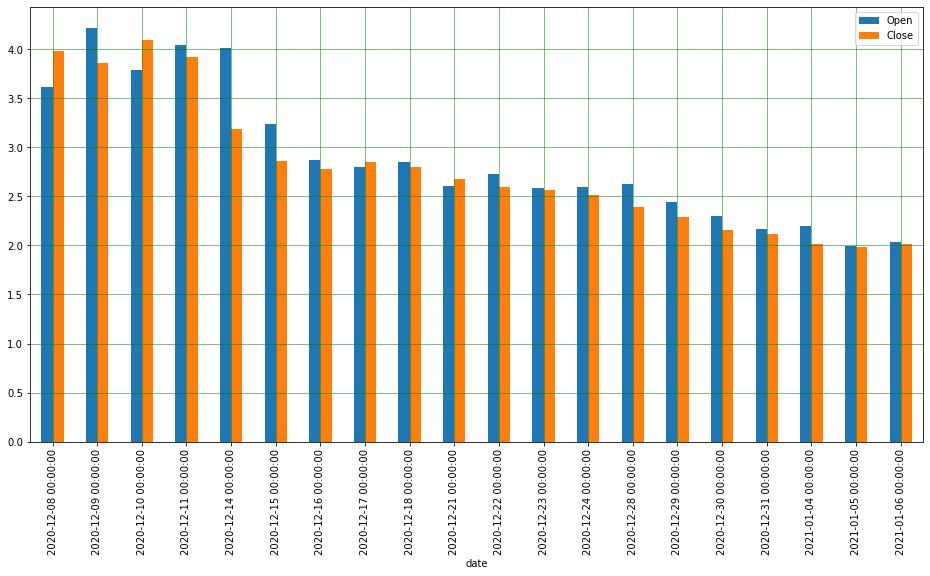

In [88]:
df_interpol = amc_result
#Plot Open vs Close
df_interpol[['Open','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

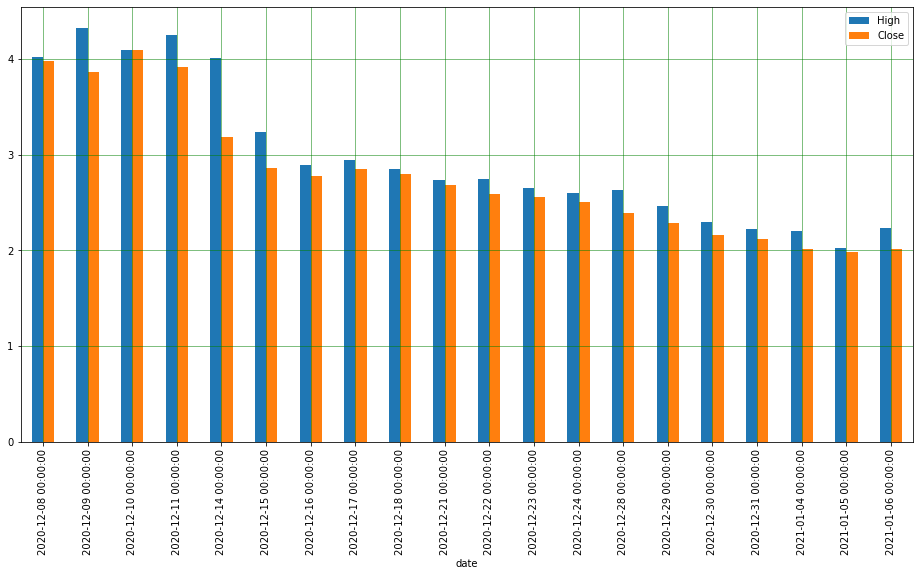

In [33]:
#Plot High vs Close
df_interpol[['High','Close']].head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

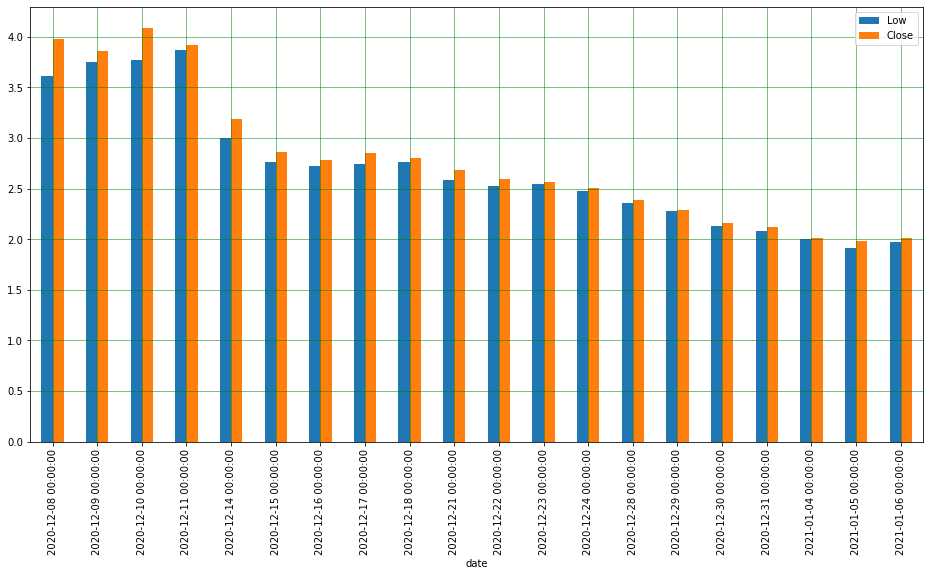

In [34]:
#Plot Low vs Close
df_interpol[["Low", "Close"]].head(20).plot(kind="bar", figsize=(16,8))
plt.grid(which="major", linestyle="-", linewidth="0.5", color="green")
plt.grid(which="minor", linestyle=":", linewidth="0.5", color="black")
plt.show()

In [ ]:
# df_interpol["Year"]=df_interpol["datetime"].dt.year
# df_interpol["Month"]=df_interpol["datetime"].dt.month
# df_interpol["Day"]=df_interpol["datetime"].dt.day

In [ ]:
# df_interpol=df_interpol[["Day","Month","Year","High","Open","Low","Close"]]
# df_interpol.head(10)

In [62]:
#  separate Independent and dependent variable
# X = amc_result.iloc[:,amc_result.columns !="Close"]
X = amc_result["mentions"]
# variable being predicted "Close" col 5
Y = amc_result["Close"]

In [64]:
# amc_result

In [65]:
print(X.shape) 
print(Y.shape) 

(40,)
(40,)


In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=.25)

In [67]:
print(x_train.shape) 
print(x_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(30,)
(10,)
(30,)
(10,)


In [76]:
#reshape

lr_model=LinearRegression()
lr_model.fit(x_train.values.reshape(-1, 1),y_train)

LinearRegression()

In [78]:
# y_pred=lr_model.predict(x_test)
y_pred = lr_model.predict(y_test.values.reshape(-1, 1))
print(y_pred.shape)

(10,)


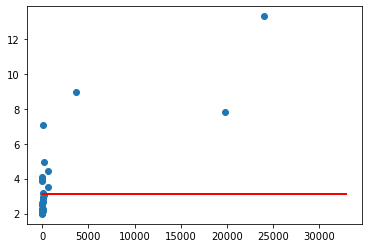

In [85]:
plt.scatter(x_train,y_train)
plt.plot(x_test, y_pred, color='red')
plt.show()

In [96]:
lr_model.score(x_test.values.reshape(-1, 1),y_test,sample_weight=None)

0.6116335239162742

In [89]:
# #Linear Model Cross-Validation
# from sklearn import model_selection
# from sklearn.model_selection import KFold
# kfold = model_selection.KFold(n_splits=15, random_state=15)
# results_kfold = model_selection.cross_val_score(lr_model, x_test, y_test.astype('int'), cv=kfold)
# print("Accuracy: ", results_kfold.mean()*100)

In [90]:
#Plot actual vs predicted
plot_df=pd.DataFrame({‘Actual’:y_test,’Pred’:y_pred})
plot_df.head(20).plot(kind='bar',figsize=(16,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

SyntaxError: invalid character in identifier (<ipython-input-90-b7c9d2668317>, line 2)